In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import datetime as dt
import os
import requests
import math
from scipy.interpolate import spline

In [2]:
def download_file(url, filename):
    """
    Helper method handling downloading large files from `url` to `filename`. Returns a pointer to `filename`.
    """
    r = requests.get(url, stream=True)
    with open(filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
    return filename

In [3]:
data = download_file("https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD",
                    "NYPD_Motor_Vehicle_Collisions.csv")
df = pd.read_csv(data, index_col=23)
df.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
UNIQUE KEY,,,,,,,,,,,,,,,,,,,,,
3787773,11/11/2017,0:00,BRONX,10468,40.866480,-73.895195,"(40.86648, -73.895195)",NaN,NaN,113 EAST KINGSBRIDGE ROAD,...,Unspecified,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,BU,NaN,NaN,NaN
3788306,11/11/2017,0:00,BRONX,10475,40.868320,-73.833170,"(40.86832, -73.83317)",BARTOW AVENUE,EDSON AVENUE,NaN,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
3788809,11/11/2017,0:00,BROOKLYN,11207,40.673150,-73.896194,"(40.67315, -73.896194)",PENNSYLVANIA AVENUE,GLENMORE AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3787924,11/11/2017,0:00,QUEENS,11428,40.718500,-73.735310,"(40.7185, -73.73531)",JAMAICA AVENUE,SPRINGFIELD BOULEVARD,NaN,...,Unspecified,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3787575,11/11/2017,0:00,QUEENS,11432,40.709785,-73.798180,"(40.709785, -73.79818)",NaN,NaN,87-32 165 STREET,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [4]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,940879.000000,940879.000000,1.152443e+06,1.152443e+06,1.152443e+06,1.152443e+06,1.152443e+06,1.152443e+06,1.152443e+06,1.152443e+06
mean,40.719843,-73.922667,2.567225e-01,1.200927e-03,5.209195e-02,6.638072e-04,2.077760e-02,7.983041e-05,1.852491e-01,4.581571e-04
std,0.383473,1.147837,6.575572e-01,3.703100e-02,2.390238e-01,2.694148e-02,1.455000e-01,9.031033e-03,6.185271e-01,2.367148e-02
min,0.000000,-201.359990,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,41.126150,0.000000,4.300000e+01,8.000000e+00,2.800000e+01,8.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00


In [5]:
df.columns

Index([u'DATE', u'TIME', u'BOROUGH', u'ZIP CODE', u'LATITUDE', u'LONGITUDE',
       u'LOCATION', u'ON STREET NAME', u'CROSS STREET NAME',
       u'OFF STREET NAME', u'NUMBER OF PERSONS INJURED',
       u'NUMBER OF PERSONS KILLED', u'NUMBER OF PEDESTRIANS INJURED',
       u'NUMBER OF PEDESTRIANS KILLED', u'NUMBER OF CYCLIST INJURED',
       u'NUMBER OF CYCLIST KILLED', u'NUMBER OF MOTORIST INJURED',
       u'NUMBER OF MOTORIST KILLED', u'CONTRIBUTING FACTOR VEHICLE 1',
       u'CONTRIBUTING FACTOR VEHICLE 2', u'CONTRIBUTING FACTOR VEHICLE 3',
       u'CONTRIBUTING FACTOR VEHICLE 4', u'CONTRIBUTING FACTOR VEHICLE 5',
       u'VEHICLE TYPE CODE 1', u'VEHICLE TYPE CODE 2', u'VEHICLE TYPE CODE 3',
       u'VEHICLE TYPE CODE 4', u'VEHICLE TYPE CODE 5'],
      dtype='object')

In [6]:
#get a feel for what types the data are, and how they might need tweaking
for i in df.columns:
    item = str(i)
    print(item, df[item].iloc[0], type(df[item].iloc[0]))

('DATE', '11/11/2017', <type 'str'>)
('TIME', '0:00', <type 'str'>)
('BOROUGH', 'BRONX', <type 'str'>)
('ZIP CODE', 10468.0, <type 'float'>)
('LATITUDE', 40.866479999999996, <type 'numpy.float64'>)
('LONGITUDE', -73.895195000000001, <type 'numpy.float64'>)
('LOCATION', '(40.86648, -73.895195)', <type 'str'>)
('ON STREET NAME', nan, <type 'float'>)
('CROSS STREET NAME', nan, <type 'float'>)
('OFF STREET NAME', '113       EAST KINGSBRIDGE ROAD         ', <type 'str'>)
('NUMBER OF PERSONS INJURED', 0, <type 'numpy.int64'>)
('NUMBER OF PERSONS KILLED', 0, <type 'numpy.int64'>)
('NUMBER OF PEDESTRIANS INJURED', 0, <type 'numpy.int64'>)
('NUMBER OF PEDESTRIANS KILLED', 0, <type 'numpy.int64'>)
('NUMBER OF CYCLIST INJURED', 0, <type 'numpy.int64'>)
('NUMBER OF CYCLIST KILLED', 0, <type 'numpy.int64'>)
('NUMBER OF MOTORIST INJURED', 0, <type 'numpy.int64'>)
('NUMBER OF MOTORIST KILLED', 0, <type 'numpy.int64'>)
('CONTRIBUTING FACTOR VEHICLE 1', 'Unspecified', <type 'str'>)
('CONTRIBUTING FACTO

In [7]:
cols_to_drop = [u'LATITUDE', u'LONGITUDE', u'ON STREET NAME', u'CROSS STREET NAME',
       u'OFF STREET NAME', u'NUMBER OF PERSONS INJURED',
       u'NUMBER OF PERSONS KILLED', u'NUMBER OF PEDESTRIANS INJURED',
       u'NUMBER OF PEDESTRIANS KILLED', u'NUMBER OF MOTORIST INJURED',
       u'NUMBER OF MOTORIST KILLED', u'CONTRIBUTING FACTOR VEHICLE 1',
       u'CONTRIBUTING FACTOR VEHICLE 2', u'CONTRIBUTING FACTOR VEHICLE 3',
       u'CONTRIBUTING FACTOR VEHICLE 4', u'CONTRIBUTING FACTOR VEHICLE 5',
       u'VEHICLE TYPE CODE 1', u'VEHICLE TYPE CODE 2', u'VEHICLE TYPE CODE 3',
       u'VEHICLE TYPE CODE 4', u'VEHICLE TYPE CODE 5']

In [8]:
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LOCATION,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED
UNIQUE KEY,,,,,,,
3787773,11/11/2017,0:00,BRONX,10468,"(40.86648, -73.895195)",0,0
3788306,11/11/2017,0:00,BRONX,10475,"(40.86832, -73.83317)",0,0
3788809,11/11/2017,0:00,BROOKLYN,11207,"(40.67315, -73.896194)",0,0
3787924,11/11/2017,0:00,QUEENS,11428,"(40.7185, -73.73531)",0,0
3787575,11/11/2017,0:00,QUEENS,11432,"(40.709785, -73.79818)",0,0


In [211]:
df['cyclists_involved'] = df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF CYCLIST KILLED']
cyclist_accidents = df[df['cyclists_involved'] > 0]
cyclist_accidents.rename(columns={'NUMBER OF CYCLIST INJURED': 'cyclists_injured',
                                  'NUMBER OF CYCLIST KILLED': 'cyclists_killed',
                                  'ZIP CODE': 'zip_code', 'DATE':'date', 'TIME': 'time',
                                  'BOROUGH': 'borough', 'LOCATION': 'location'},
                         inplace=True)
cyclist_accidents['zip_code'] = cyclist_accidents['zip_code'].fillna(0).astype(int).astype(str)
cyclist_accidents['location'] = cyclist_accidents['location'].fillna(0)
cyclist_accidents.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date,time,borough,zip_code,location,cyclists_injured,cyclists_killed,cyclists_involved
UNIQUE KEY,,,,,,,,
3787879,11/11/2017,11:50,NaN,0,"(40.73736, -73.99685)",1,0,1
3788008,11/11/2017,16:15,NaN,0,0,1,0,1
3788041,11/11/2017,16:20,NaN,0,"(40.731964, -73.98816)",1,0,1
3788700,11/11/2017,16:40,BRONX,10462,"(40.833557, -73.85774)",1,0,1
3787995,11/11/2017,17:40,QUEENS,11370,"(40.76854, -73.89342)",1,0,1


In [212]:
cyclist_accidents['date'] = pd.to_datetime(cyclist_accidents['date'])
cyclist_accidents['time'] = pd.to_datetime(cyclist_accidents['time'])
cyclist_accidents['time'] = cyclist_accidents['time'].apply(lambda x: round((x.hour + float(x.minute) / 60), 0))
cyclist_accidents.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,date,time,borough,zip_code,location,cyclists_injured,cyclists_killed,cyclists_involved
UNIQUE KEY,,,,,,,,
3787879,2017-11-11,12.0,NaN,0,"(40.73736, -73.99685)",1,0,1
3788008,2017-11-11,16.0,NaN,0,0,1,0,1
3788041,2017-11-11,16.0,NaN,0,"(40.731964, -73.98816)",1,0,1
3788700,2017-11-11,17.0,BRONX,10462,"(40.833557, -73.85774)",1,0,1
3787995,2017-11-11,18.0,QUEENS,11370,"(40.76854, -73.89342)",1,0,1


In [213]:
cyc_killed = cyclist_accidents.groupby(['time'])['cyclists_killed'].sum()
cyc_injured = cyclist_accidents.groupby(['time'])['cyclists_injured'].sum()

In [214]:
inj_vs_kil = pd.DataFrame({'cyc_killed': cyc_killed,
                           'cyc_injured': cyc_injured})
inj_vs_kil

,cyc_injured,cyc_killed
time,,
0.0,460,5
1.0,369,3
2.0,231,1
3.0,163,1
4.0,134,1
5.0,154,4
6.0,199,3
7.0,438,7
8.0,780,6


In [215]:
inj_vs_kil['cyc_injured_norm'] = inj_vs_kil.cyc_injured.apply(lambda x: float(x) / inj_vs_kil.cyc_injured.sum())
inj_vs_kil['cyc_killed_norm'] = inj_vs_kil.cyc_killed.apply(lambda x: float(x) / inj_vs_kil.cyc_killed.sum())
inj_vs_kil['killed_minus_injured'] = inj_vs_kil['cyc_killed_norm'] - inj_vs_kil['cyc_injured_norm']

#fixing the fact that there are 2 midnights ('0.0' and '24.0')
inj_vs_kil.iloc[0] = inj_vs_kil.iloc[0] + inj_vs_kil.iloc[-1]
inj_vs_kil.drop([24.0], axis=0, inplace=True)

inj_vs_kil

,cyc_injured,cyc_killed,cyc_injured_norm,cyc_killed_norm,killed_minus_injured
time,,,,,
0.0,727.0,6.0,0.030361,0.065217,0.034856
1.0,369.0,3.0,0.015410,0.032609,0.017198
2.0,231.0,1.0,0.009647,0.010870,0.001222
3.0,163.0,1.0,0.006807,0.010870,0.004062
4.0,134.0,1.0,0.005596,0.010870,0.005273
5.0,154.0,4.0,0.006431,0.043478,0.037047
6.0,199.0,3.0,0.008311,0.032609,0.024298
7.0,438.0,7.0,0.018292,0.076087,0.057795
8.0,780.0,6.0,0.032575,0.065217,0.032643


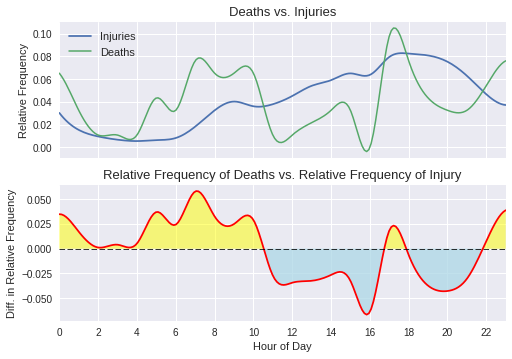

In [334]:
y1 = np.array(inj_vs_kil.cyc_injured_norm)
y2 = np.array(inj_vs_kil.cyc_killed_norm)
y3 = np.array(inj_vs_kil.killed_minus_injured)
x = np.array(inj_vs_kil.index)

x_smooth = np.linspace(x.min(), x.max(), 200)
y1_smooth = spline(x, y1, x_smooth)
y2_smooth = spline(x, y2, x_smooth)
y3_smooth = spline(x, y3, x_smooth)
x_axis = x_smooth-x_smooth

f, ax = pl.subplots(2, sharex=True)

ax[0].plot(x_smooth, y1_smooth)
ax[0].plot(x_smooth, y2_smooth, linewidth=1.5)
ax[0].set_title('Deaths vs. Injuries', fontsize=13)

ax[1].plot(x_smooth, y3_smooth, 'r')
ax[1].plot(x_smooth, x_axis, 'k--', linewidth=0.8)
ax[1].set_title('Relative Frequency of Deaths vs. Relative Frequency of Injury', fontsize=13)
ax[1].fill_between(x_smooth, y3_smooth, x_axis, alpha=0.5,
                   where=y3_smooth >= x_axis, facecolor='yellow', interpolate=True)
ax[1].fill_between(x_smooth, y3_smooth, x_axis, alpha=0.75,
                   where=y3_smooth <= x_axis, facecolor='lightblue', interpolate=True)

pl.xticks(range(0, 24, 2))
pl.xlim(0,23)
ax[0].legend(['Injuries', 'Deaths'], loc=0, fontsize=11)
pl.xlabel('Hour of Day')
ax[0].set_ylabel('Relative Frequency')
ax[1].set_ylabel('Diff. in Relative Frequency')

pl.show()

<p> **Figure:** <font size="2">Here we have plots, attempting to answer the semi-morbid question of "When you decide to go for a bikeride, if you were to get in an accident, when would you be more likely to die from it rather than simply being injured?" (How did I get down this rabbit hole? ...I have no idea. Let's not get too meta here.) While you are, in nearly all cases, more likely to be simply injured than die from an accident, we are seeking to identify where, if an accident occurs, it is more likely to be a fatal one. To do so, we took the relative frequency of injury occuring in a certain hour (number of injuries in that hour over total injuries) and likewise for deaths. The top graph is a comparison of these two relative frequencies. The bottom graph takes the difference of lines in the top chart to indentify times when, if an accident occurs, it is particularly likely (or unlikely) to be fatal. <br>
Our findings suggest that early morning hours through morning commute are the most dangerous in this regard, with a sudden drop as midday approaches, with a slight uptick around the evening commute and finally late evening. Perhaps most tourists ride during the day, and are particularly safe because they aren't in a hurry to get to work? Maybe people tend to ride on slower roads in mid-day for some reason, thus making accidents less-likely to be fatal. Further investigation needs to be performed, but we do see some trends indicated in this analysis.</font></p>